# What drives the success of a song? -- Capstone Initial Report and EDA (Raatib Tanvir)

##### We would like to **determine what aspects of a song on Spotify contribute to its success**, particularly how much it is streamed and how frequently it shows up on popular playlists. The featured dataset, sourced from Kaggle user Solomon Ameh, denotes aspects of a song like "energy," "tempo," or "danceability" and scores them numerically, allowing us to relate them to a given song's commercial success on Spotify, which is scored numerically in the dataset by the metric "track popularity." By **relating these aspects of the data by using an appropriate machine learning model**, we can understand how they **contribute to the song's success**.

### Data Preparation


***General possible integrity issues***
* integrity issues - nans, numbered and non-numbered, duplicates
* considerations - useful vs. non-useful columns

In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

songs = pd.read_csv('high_popularity_spotify_data.csv', index_col=0)
songs.info

<bound method DataFrame.info of           tempo  danceability playlist_genre  loudness  liveness  valence  \
energy                                                                      
0.592   157.969         0.521            pop    -7.777    0.1220    0.535   
0.507   104.978         0.747            pop   -10.171    0.1170    0.438   
0.808   108.548         0.554            pop    -4.169    0.1590    0.372   
0.910   112.966         0.670            pop    -4.070    0.3040    0.786   
0.783   149.027         0.777            pop    -4.477    0.3550    0.939   
...         ...           ...            ...       ...       ...      ...   
0.422   124.357         0.573          latin    -7.621    0.1020    0.693   
0.725   105.016         0.711          latin    -8.315    0.1100    0.530   
0.809    99.005         0.724          latin    -5.022    0.0765    0.606   
0.642    83.389         0.463          latin    -4.474    0.0686    0.339   
0.890   126.881         0.645            pop

***Check NaNs***

Result: The dataset is clear of any relevant NaNs

In [25]:
print(songs.isna().sum().sort_values(ascending=False))

track_album_name            1
tempo                       0
track_id                    0
type                        0
playlist_subgenre           0
id                          0
acousticness                0
duration_ms                 0
key                         0
mode                        0
track_album_id              0
instrumentalness            0
track_album_release_date    0
track_name                  0
analysis_url                0
danceability                0
playlist_name               0
uri                         0
track_href                  0
track_popularity            0
speechiness                 0
time_signature              0
track_artist                0
valence                     0
liveness                    0
loudness                    0
playlist_genre              0
playlist_id                 0
dtype: int64


***Deciding what to do***
* Remove duplicates
* Remove columns that do not pertain to our analysis:
    * ['track_popularity', 'track_href', 'uri', 'track_album_name', 'analysis_url', 'track_id', 'track_album_release_date', 'track_album_id', 'id', 'type', 'playlist_id']
* Determine columns that may be omitted during analysis:
    * For now, we will work with the numeric columns only
* Differentiate remaining columns based on numericness -- numeric vs. non-numeric
    * use is_numeric or select_dtypes(include=np.number)
* Determine the column that defines our predictor variable, which we will assign to "y" for our desired machine learning model.
    * track_popularity

# Determining and coding the evaluation metric

We want to determine what leads to a song's success. The dataset's "track popularity" column provides a score from 1-100 that denotes how successful a song was using metrics like stream count and occurrences in popular playlists. This score gives us a comprehensive understanding of how a song performs at a commercial level on Spotify. Thus, using it as our evaluation metric, and setting it to our "y" variable for analysis, will allow us to understand how other variables that pertain to each song contribute as predictors for the song's eventual success.

In [26]:
y = songs['track_popularity']

In [27]:
#Drop our y axis and drop all non-applicable columns
songs = songs.drop_duplicates()
s = songs.drop(['track_popularity', 'track_href', 'uri', 'track_album_name', 'analysis_url', 'track_id', 'track_album_release_date', 'track_album_id', 'id', 'type', 'playlist_id'], axis=1)
#Remaining non-numerics: 'playlist_genre', 'track_artist', 'playlist_name', 'playlist_subgenre'

#28 columns is now 17 columns
s.info

<bound method DataFrame.info of           tempo  danceability playlist_genre  loudness  liveness  valence  \
energy                                                                      
0.592   157.969         0.521            pop    -7.777    0.1220    0.535   
0.507   104.978         0.747            pop   -10.171    0.1170    0.438   
0.808   108.548         0.554            pop    -4.169    0.1590    0.372   
0.910   112.966         0.670            pop    -4.070    0.3040    0.786   
0.783   149.027         0.777            pop    -4.477    0.3550    0.939   
...         ...           ...            ...       ...       ...      ...   
0.422   124.357         0.573          latin    -7.621    0.1020    0.693   
0.725   105.016         0.711          latin    -8.315    0.1100    0.530   
0.809    99.005         0.724          latin    -5.022    0.0765    0.606   
0.642    83.389         0.463          latin    -4.474    0.0686    0.339   
0.890   126.881         0.645            pop

In [28]:
#Numeric columns only --> 12 columns
s_num = s.select_dtypes(include=np.number)
s_num.info

<bound method DataFrame.info of           tempo  danceability  loudness  liveness  valence  time_signature  \
energy                                                                       
0.592   157.969         0.521    -7.777    0.1220    0.535               3   
0.507   104.978         0.747   -10.171    0.1170    0.438               4   
0.808   108.548         0.554    -4.169    0.1590    0.372               4   
0.910   112.966         0.670    -4.070    0.3040    0.786               4   
0.783   149.027         0.777    -4.477    0.3550    0.939               4   
...         ...           ...       ...       ...      ...             ...   
0.422   124.357         0.573    -7.621    0.1020    0.693               5   
0.725   105.016         0.711    -8.315    0.1100    0.530               4   
0.809    99.005         0.724    -5.022    0.0765    0.606               4   
0.642    83.389         0.463    -4.474    0.0686    0.339               4   
0.890   126.881         0.645   

### Linear Regression Model -- all numeric features

For the sake of our initial analysis, we have decided to use only the numeric columns as features. The numeric columns make up a majority of our applicable 

LinearRegression(fit_intercept=False)
[ 8.57329211e-02  1.41921199e+01 -2.80028775e-01  7.78845276e+00
  1.91255610e-01  1.15329987e+01 -1.27051455e+01 -1.77633316e+00
  8.51694268e-01  1.94271187e-01  2.63119105e-05  5.27720957e+00]
64.40983400647602
             feature       coef
0              tempo   0.085733
1       danceability  14.192120
2           loudness  -0.280029
3           liveness   7.788453
4            valence   0.191256
5     time_signature  11.532999
6        speechiness -12.705146
7   instrumentalness  -1.776333
8               mode   0.851694
9                key   0.194271
10       duration_ms   0.000026
11      acousticness   5.277210


Text(0.5, 1.0, 'Results of Linear Regression on Numeric Track Features vs. Track Popularity')

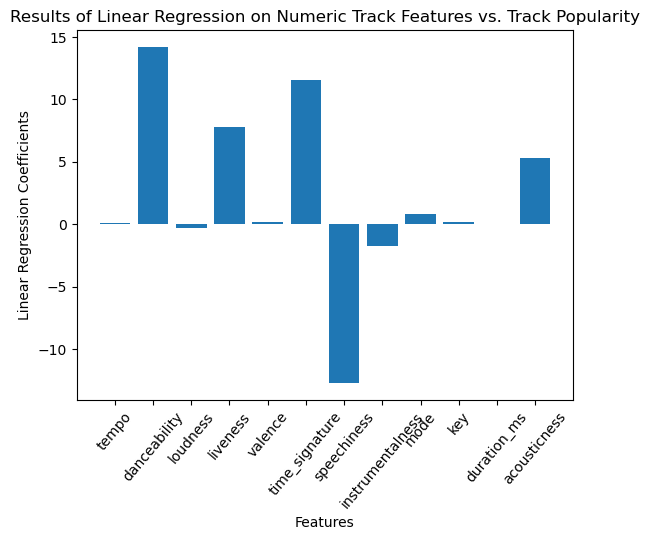

In [29]:
###Linear regression
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


X = pd.get_dummies(s_num)
all_features_linreg = LinearRegression(fit_intercept=False).fit(X, y)
linreg_mse = mean_squared_error(all_features_linreg.predict(X), y)




print(all_features_linreg)
print(all_features_linreg.coef_)
print(linreg_mse)

feature_names = (list(X.columns))
linreg_df = pd.DataFrame({'feature': feature_names, 'coef': all_features_linreg.coef_})
print(linreg_df)


plt.bar(feature_names, all_features_linreg.coef_)
plt.xlabel('Features')
plt.xticks(rotation=50)
plt.ylabel('Linear Regression Coefficients')
plt.title('Results of Linear Regression on Numeric Track Features vs. Track Popularity')


## Analysis
Initial analysis of our linear regression coefficients hints us to the following conclusions, which we may further confirm by choosing different machine learning models and further editing our data.


### We can sum up our findings to three big takeaways:

### 1) Danceability, time_signature, and speechiness are major indicators of song success. 
##### Specifically, **higher danceability has a very strong likelyhood to increase the virality** of a song, as is a **higher time signature**. This implies that listeners prefer faster, more upbeat songs. Likewise, more **"speechiness" makes a song much, much less likely** to succeed.




### 2) Liveness and acousticness are other significant indicators of song success.
##### Live and acoustic versions of songs can perform quite successfully. They are not as success-producing as danceability or time signature, but they are still strongly positively linked to virality. This implies that **users do prefer the occassional live or acoustic version of a song, perhaps preferring an authentic presence** to the track they are listening to!

### 3) The remaining numeric features are insignificant in predicting the success of a song.
##### Our analysis implies a lack of relationship between the following features and the success of a song:
##### tempo, loudness, valence, instrumentalness, mode, key, duration_ms

##### a) Tempo, mode, key, and valence are all relatively specific measures that may evoke a variety of emotions depending on how they are configured for a track. Given how widespread different tempos, keys, and so on are implemented by artists, it is unsurprising that the most successful tracks may come from a vast range of these configurations. Still, it is interesting to find out that **specific keys, tempos and so on -- which help indicate the mood and intention of a song -- don't predict success. Listeners are always looking for a variety of experiences!**

##### b) Similarly, **duration of a song doesn't predict success -- listeners will not discriminate against long or short songs!** We can do further analysis to see if our data truly includes songs that are varying in length, or if perhaps our contenders are all of similar length in the first place. Maybe measuring in milliseconds is keeping us from finding out more, so changing the scale with which this is measured could help us -- later, we may convert milliseconds to seconds and reassess.